In [1]:
%%html
<style>
div.input {
    display:none;
}
</style>

In [2]:
import pandas as pd
import pylab as pl
import seaborn as sn
import numpy as np
import zipfile
import geopandas as gp
import statsmodels as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv("data_hog_viv.csv")
municipios = gp.GeoDataFrame.from_file("mpio.shp")

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
municipios["MPIO"] = municipios["MPIO"].astype(str)
data["DPTOMPIO"] = data.DPTOMPIO.astype(str)
data = pd.merge(data, municipios, left_on = "DPTOMPIO", right_on="MPIOS")

data["ruido"] = data["ruido"].replace(2,0)
data["publicidad"] = data["publicidad"].replace(2,0)
data["inseguridad"] = data["inseguridad"].replace(2,0)
data["aire"] = data["aire"].replace(2,0)
data["olores"] = data["olores"].replace(2,0)
data["basura"] = data["basura"].replace(2,0)
data["invasion_ep"] = data["invasion_ep"].replace(2,0)
data["animales"] = data["animales"].replace(2,0)
data["planes_adquisicion"] = data["planes_adquisicion"].replace(2,0)
data["subsidio"] = data["subsidio"].replace(2,0)
data["posee_carro"] = data["posee_carro"].replace(2,0)
data["posee_moto"] = data["posee_moto"].replace(2,0)
data["posee_bici"] = data["posee_bici"].replace(2,0)
data["tiene_gas"] = data["tiene_gas"].replace(2,0)
data["tiene_telefono"] = data["tiene_telefono"].replace(2,0)
data["tiene_computador"] = data["tiene_computador"].replace(2,0)
data["tiene_portatil"] = data["tiene_portatil"].replace(2,0)
data["tiene_tablet"] = data["tiene_tablet"].replace(2,0)
data["tiene_internet"] = data["tiene_internet"].replace(2,0)
data["autoasignacion_pobreza"] = data["autoasignacion_pobreza"].replace(2,0)

data_municipal = data.groupby(data["MPIO"]).mean().reset_index()

data_municipal = pd.merge(data_municipal, municipios, on="MPIO")

data_municipal=data_municipal[(data_municipal.NOMBRE_DPT=="CUNDINAMARCA") | (data_municipal.NOMBRE_DPT=="SANTAFE DE BOGOTA D.C")]

cundinamarca = municipios[municipios.NOMBRE_DPT=="CUNDINAMARCA"] 

data_municipal = gp.GeoDataFrame(data_municipal)

In [5]:
data_municipal.NOMBRE_MPI.unique()

array(['SANTAFE DE BOGOTA D.C.', 'AGUA DE DIOS', 'BOJACA', 'CAJICA',
       'CAQUEZA', 'CHIA', 'CHOCONTA', 'COGUA', 'COTA', 'EL ROSAL',
       'FACATATIVA', 'FUNZA', 'FUSAGASUGA', 'GACHANCIPA', 'GACHETA',
       'GIRARDOT', 'GUADUAS', 'GUATAVITA', 'LA CALERA', 'LA MESA',
       'MADRID', 'MEDINA', 'MOSQUERA', 'NEMOCON', 'PACHO',
       'SAN JUAN DE RIO SECO', 'SESQUILE', 'SIBATE', 'SOACHA', 'SOPO',
       'SUBACHOQUE', 'SUTATAUSA', 'TABIO', 'TAUSA', 'TENJO', 'TOCANCIPA',
       'UBATE', 'VILLETA', 'ZIPAQUIRA'], dtype=object)

In [6]:
nombre_municipio = input("inserte aca el nombre del municipio que le interesa en mayúsculas y sin tildes. Puede ver la lista de municipios disponibles para comparación arriba")

municipio = data_municipal[data_municipal.NOMBRE_MPI == nombre_municipio]
municipio = gp.GeoDataFrame(municipio)

inserte aca el nombre del municipio que le interesa en mayúsculas y sin tildes. Puede ver la lista de municipios disponibles para comparación arribaCHIA


encuentre en rojo la ubicación geográfica de CHIA


(896682.6400969441, 1122699.4693465552, 883596.5568272583, 1147068.3917286436)

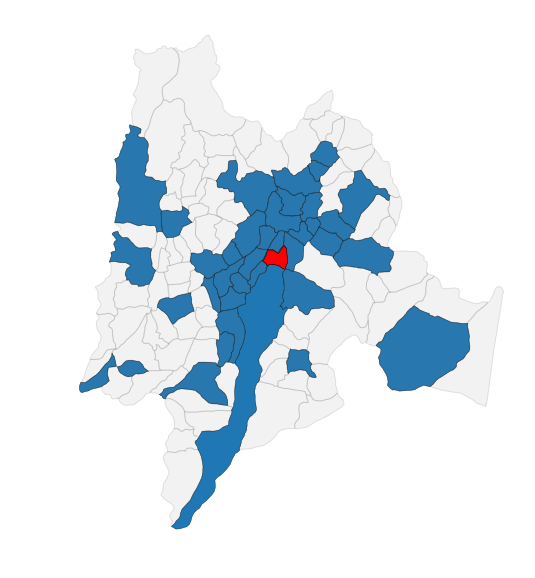

In [7]:
base = data_municipal.plot(figsize=(10,10), edgecolor="k", lw=0.3)
cundinamarca.plot(ax = base, legend=True, color = "grey", lw = 1, alpha = 0.1, edgecolor="k")


municipio.plot(ax = base, legend=True, color = "r", lw = 0.5, edgecolor="k")


print("encuentre en rojo la ubicación geográfica de", nombre_municipio)

plt.axis("off")

In [8]:
print("Así se compara su municipio con los demás que hacen parte de la encuesta multipropósito (azules) en algunas variables de percepción:")

print("")

print("Porcentaje de viviendas que consideran la inseguridad un problema:", "%.2f" %(municipio.inseguridad.mean()*100),"%")
print("Promedio regional porcentaje de viviendas que consideran la inseguridad un problema:",
       "%.2f"%(data_municipal.inseguridad.mean()*100),"%")

print("")

print("Porcentaje de viviendas que consideran el aire un problema:", "%.2f" %(municipio.aire.mean()*100),"%")
print("Promedio regional porcentaje de viviendas que consideran el aire un problema:",
       "%.2f"%(data_municipal.aire.mean()*100),"%")

print("")

print("Porcentaje de viviendas que consideran la invasión al espacio publico un problema:", "%.2f" %(municipio.invasion_ep.mean()*100),"%")
print("Promedio regional porcentaje de viviendas que consideran la invasion al espacio público un problema:",
       "%.2f"%(data_municipal.invasion_ep.mean()*100),"%")

print("")

print("Porcentaje de viviendas que se autoconsideran pobres", "%.2f" %(municipio.autoasignacion_pobreza.mean()*100),"%")
print("Promedio regional porcentaje de viviendas que autpconsideran pobres:",
       "%.2f"%(data_municipal.autoasignacion_pobreza.mean()*100),"%")

print("")

print("así se compara en el porcentaje de hogares con acceso a algunos servicios")

print("")

print("Porcentaje de viviendas que tienen gas natural", "%.2f" %(municipio.tiene_gas.mean()*100),"%")
print("Promedio regional porcentaje de viviendas que tienen gas natural:",
       "%.2f"%(data_municipal.tiene_gas.mean()*100),"%")

print("")

print("Porcentaje de viviendas que tienen internet", "%.2f" %(municipio.tiene_internet.mean()*100),"%")
print("Promedio regional porcentaje de viviendas que tienen internet:",
       "%.2f"%(data_municipal.tiene_gas.mean()*100),"%")

print("")

print("así se compara en posesión de vehículos")

print("")

print("Porcentaje de hogares con carro", "%.2f" %(municipio.posee_carro.mean()*100),"%")
print("Promedio regional porcentaje de viviendas que tienen carro:",
       "%.2f"%(data_municipal.posee_carro.mean()*100),"%")

print("")

print("Porcentaje de hogares con moto", "%.2f" %(municipio.posee_moto.mean()*100),"%")
print("Promedio regional porcentaje de viviendas que tienen moto:",
       "%.2f"%(data_municipal.posee_moto.mean()*100),"%")
print("")

print("Porcentaje de hogares con bicicleta", "%.2f" %(municipio.posee_bici.mean()*100),"%")
print("Promedio regional porcentaje de viviendas que tienen bicicleta:",
       "%.2f"%(data_municipal.posee_bici.mean()*100),"%")

Así se compara su municipio con los demás que hacen parte de la encuesta multipropósito (azules) en algunas variables de percepción:

Porcentaje de viviendas que consideran la inseguridad un problema: 51.96 %
Promedio regional porcentaje de viviendas que consideran la inseguridad un problema: 39.01 %

Porcentaje de viviendas que consideran el aire un problema: 25.65 %
Promedio regional porcentaje de viviendas que consideran el aire un problema: 18.54 %

Porcentaje de viviendas que consideran la invasión al espacio publico un problema: 9.24 %
Promedio regional porcentaje de viviendas que consideran la invasion al espacio público un problema: 7.97 %

Porcentaje de viviendas que se autoconsideran pobres 14.24 %
Promedio regional porcentaje de viviendas que autpconsideran pobres: 19.85 %

así se compara en el porcentaje de hogares con acceso a algunos servicios

Porcentaje de viviendas que tienen gas natural 90.98 %
Promedio regional porcentaje de viviendas que tienen gas natural: 79.44 %


In [9]:
print("NOMBRE A INSERTAR            DESCRPCION")
print("")
print("posee_moto              =     porcentaje de hogares con moto")
print("posee_carro             =     porcentaje de hogares con carro")
print("posee_bici              =     porcentaje de hogares con bicicleta")
print("inseguridad             =     porcentaje de viviendas que consideran la inseguridad un problema cercano")
print("aire                    =     porcentaje de viviendas que consideran la calidad del aire un problema cercano")
print("invasion_ep             =     porcentaje de viviendas que consideran la invasión al espacio_publico un problema cercano")
print("autoasignacion_pobreza  =     porcentaje de hogares que se autoconsideran pobres")
print("tiene_gas               =     porcentaje de hogares que tienen gas natural")
print("tiene_internet          =     porcentaje de hogares que tienen internet")

NOMBRE A INSERTAR            DESCRPCION

posee_moto              =     porcentaje de hogares con moto
posee_carro             =     porcentaje de hogares con carro
posee_bici              =     porcentaje de hogares con bicicleta
inseguridad             =     porcentaje de viviendas que consideran la inseguridad un problema cercano
aire                    =     porcentaje de viviendas que consideran la calidad del aire un problema cercano
invasion_ep             =     porcentaje de viviendas que consideran la invasión al espacio_publico un problema cercano
autoasignacion_pobreza  =     porcentaje de hogares que se autoconsideran pobres
tiene_gas               =     porcentaje de hogares que tienen gas natural
tiene_internet          =     porcentaje de hogares que tienen internet


inserte aca una variable que quiera mapear de las que se encuentran arribaposee_carro


C:\Users\user\Anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


(896682.6400969441, 1122699.4693465554, 883596.5568272582, 1147068.3917286433)

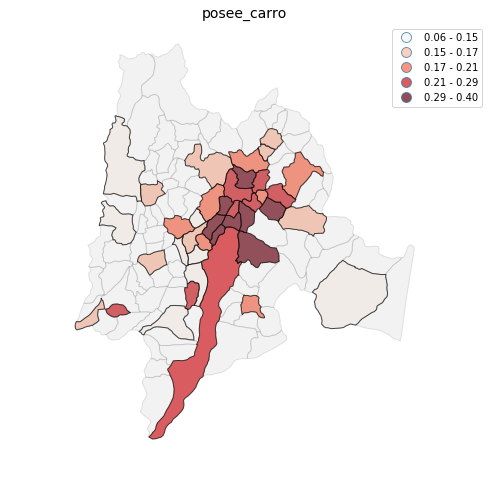

In [10]:
variable_interes = input("inserte aca una variable que quiera mapear de las que se encuentran arriba")

base = data_municipal.plot( figsize=(8,8),column=variable_interes,cmap='Reds',edgecolor='k',legend=True, scheme = "quantiles", k =5 , alpha = 0.7)

cundinamarca.plot(ax = base, legend=True, color = "grey", lw = 1, alpha = 0.1, edgecolor="k")
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1, 0.8, 0.15, 0.2))

plt.title(variable_interes, fontsize = 14)
plt.axis("off")